In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner as gridliner

In [2]:
mat_data = scipy.io.loadmat('grid1.mat')

In [11]:
hs=mat_data['Depth']

In [12]:
numlat=hs.shape[0]
numlon=hs.shape[1]

In [14]:
hs_new=np.zeros((numlat,numlon))

In [15]:
hs_new.shape

(240, 200)

In [8]:
for i in range (numlat):
    for j in range (numlon):
        hs_new[i][j]=-hs[numlat-1-i][j]
        #print(i,j)

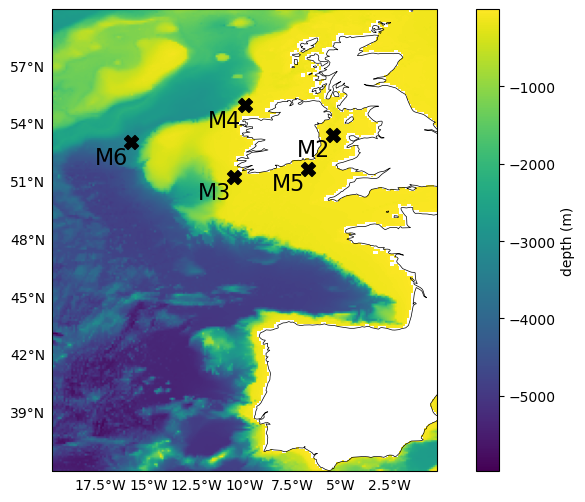

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming `hs_new` is defined
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 6))

# Plot the data
im = ax.imshow(hs_new, cmap='viridis', extent=[-20, 0, 36, 60], origin='upper')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
cbar = plt.colorbar(im, ax=ax, orientation='vertical', label='depth (m)',shrink=1)

# Set gridlines and labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0)
gl.top_labels = False
gl.right_labels = False

# Plot buoy locations
buoy_coords = [
    (-15.88, 53.07, 'M6'),
    (-9.99, 54.99, 'M4'),
    (-10.54, 51.25, 'M3'),
    (-6.7, 51.69, 'M5'),
    (-5.4, 53.48, 'M2')
]

for lon, lat, label in buoy_coords:
    ax.scatter(lon, lat, marker='X', color='black', s=100, transform=ccrs.PlateCarree())
    ax.text(lon-1.9, lat - 1.1, label, fontsize=16, color='black', transform=ccrs.PlateCarree())

# Show plot
plt.savefig('swan_domain_buoy_loc.png')
